In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import math

In [2]:
n = 13
m = 13
alpha = 0.5

border_width = 1
tonels_quantity = 2
all_possible_situation = []

In [3]:
def showField(field):
    plt.imshow(field[:,:], cmap='Greys', interpolation='nearest')
    plt.title("Cellular automata")
    plt.show()

In [4]:
def showFieldFromNumbers(alive):
    coordinates = numberToCoordinates(alive)
    
    field_with_values = np.zeros([n,m])
    for i in range(0,n):
        for j in range(0,m):
            field_with_values[i][j] = field_basic[i][j]
    for a in range(0,len(alive)):
        for i in range(0,n):
            for j in range(0,m):
                if i == int(coordinates[a][0]) and j == int(coordinates[a][1]):
                    field_with_values[i][j] = 1
    
    showField(field_with_values)

In [5]:
# creating field
field_basic = np.zeros([n,m])

# initialize borders
for i in range(0,n):
    for j in range(0,m):
        if i == 0 or j == 0 or i == n - 1 or j == m - 1:
            field_basic[i][j] = 2

In [6]:
# adding border line 
border_start = math.ceil((n - 2) / 2) - int(border_width / 2)
border_finish = math.ceil((n - 2) / 2) + int(border_width / 2)
if not(border_width %2 == 1):
    border_start = border_start + 1
    
print("Border line: " + str(border_start) + "-" + str(border_finish)) 
    
for i in range(0,n):
    for j in range(0,m):
        if i >= border_start and i <= border_finish:
            field_basic[i][j] = 2

Border line: 6-6


In [7]:
# calc tonels location
# each tonel have start position and finish possition

tonels = np.zeros([tonels_quantity,2])
tonels_width = np.ones([tonels_quantity])
# tonels_width set to 1 by default, if want to change tonels_width[tonel_number] = width

len_part = int((m-2) / tonels_quantity)
for i in range(0,tonels_quantity):
#     devide line to equal parts and take its center
    if i == 0:
        tonels[i][0] = int((1 + len_part) / 2)
        tonels[i][1] = int(tonels[i][0] + tonels_width[i] - 1)
    else:
        tonels[i][0] = int(tonels[i-1][0] + len_part) + 1
        tonels[i][1] = int(tonels[i][0] + tonels_width[i] - 1)
    print("tonel" + str(i + 1) + "(" + str(int(tonels[i][0])) + "-" + str(int(tonels[i][1])) + ")")

tonel1(3-3)
tonel2(9-9)


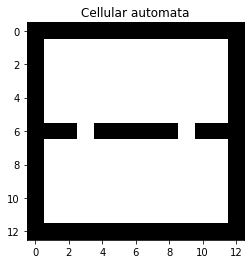

In [8]:
# adding tonels
for t in range(0,len(tonels)):
    for i in range(1,n-1):
        for j in range(1,m-1):
            if i >= border_start and i <= border_finish:
                if j >= tonels[t][0] and j <= tonels[t][1]:
                    field_basic[i][j] = 0
                
showField(field_basic)

In [9]:
frequency = np.zeros([n,m])

In [10]:
def numberToCoordinates(alive):
    no_zero_quantity = 0
    for i in range(0,len(alive)):
        if alive[i] == 0:
            break
        else: no_zero_quantity = no_zero_quantity + 1
            
    res = np.zeros([no_zero_quantity,2])
    for i in range(0,no_zero_quantity):
    #     calc i 
        res[i][0] = int(alive[i] / m)
    #     calc j
        res[i][1] = alive[i] % m
    
    return res

In [11]:
def fieldToNumber(field_with_values):
    alive_numbers = []
    one_situation = []
    for k in range(0,len(field_with_values)):
        for i in range(1,n-1):
            for j in range(1,m-1):
                if field_with_values[k][i][j] == 1:
                    number = (i * m) + j
                    one_situation.append(number)
        alive_numbers.append(np.asarray(one_situation).astype(int))
        one_situation = []
    return alive_numbers

In [12]:
def frequencyToField(frequency_local):
    alive_numbers = []
    for i in range(1,n-1):
        for j in range(1,m-1):
            if frequency_local[i][j] != 0:
                number = (i * m) + j
                alive_numbers.append(number)
    return np.array(alive_numbers)

In [13]:
def fillInField(field, alive):
    field_with_values = np.zeros([n,m])
    for i in range(0,n):
        for j in range(0,m):
            field_with_values[i][j] = field[i][j]
    for a in range(0,len(alive)):
        for i in range(0,n):
            for j in range(0,m):
                if i == int(alive[a][0]) and j == int(alive[a][1]):
                    field_with_values[i][j] = 1
               
    return field_with_values

In [14]:
def validation(field_with_values, i, j):
    if field_with_values[i][j] == 2:
        return False
    elif field_with_values[i][j] == 0 and (field_with_values[i-1][j] == 0 or field_with_values[i-1][j] == 2) and (field_with_values[i+1][j] == 0 or field_with_values[i+1][j] == 2) and (field_with_values[i][j-1] == 0 or field_with_values[i][j-1] == 2) and (field_with_values[i][j+1] == 0 or field_with_values[i][j+1] == 2): 
        return False
    else: return True

In [15]:
def calcFrequency(field_with_values):
    for i in range(1,n-1):
        for j in range(1,m-1):
            if field_with_values[i][j] == 1:
                frequency[i][j] = frequency[i][j] + 1

In [16]:
def addingInFile(forAdd, parent):
    if (len(forAdd[0]) != 0):
        if not (np.array_equal(forAdd[0],parent)):
            for j in range(0,len(forAdd)):
                data_filtered = str(forAdd[j][0]) + " "
                for i in range(1,len(forAdd[j])):
                    data_filtered = str(data_filtered) + str(forAdd[j][i]) + " "
                if (len(forAdd[j]) != step+2):
    #                 numbers quantity should be step+2
                    for k in range(0,step+2-len(forAdd[j])):
                        data_filtered = str(data_filtered) + "0 "
                
                file_next_step.write(str(data_filtered) + "\r\n")
    else:
        file_next_step.write(" " + "\r\n")

In [17]:
# rules 
def calcForCurrentStep(field_with_values, i, j):
    alive_neighbors = 0
    if field_with_values[i-1][j] == 1:
        alive_neighbors = alive_neighbors + 1
    if field_with_values[i+1][j] == 1:
        alive_neighbors = alive_neighbors + 1
    if field_with_values[i][j-1] == 1:
        alive_neighbors = alive_neighbors + 1
    if field_with_values[i][j+1] == 1:
        alive_neighbors = alive_neighbors + 1

    if alive_neighbors == 1:
        return 1
    else: 
        return 0

In [18]:
# anticipation
def anticipation(field_with_values, i, j, guess):
#     bottom ->
    res = 0 
    if(field_with_values[i+1][j] == 2): possible_neighbors = [[res,2]]
    else: possible_neighbors = [[res,0],[res,1]]

    solution = []
#     rules for anticipation
    field_for_check = np.zeros([n,m])
    for q in range(0,n):
        for w in range(0,m):
            field_for_check[q][w] = field_with_values[q][w]
    
    for k in range(0,len(possible_neighbors)):
        alive_neighbors = 0
        
        if(field_with_values[i+1][j] != 2): field_for_check[i+1][j] = possible_neighbors[k][1]
        
        if(field_for_check[i+1][j] == 1): alive_neighbors = alive_neighbors + field_for_check[i+1][j]
        if(field_for_check[i-1][j] == 1): alive_neighbors = alive_neighbors + field_for_check[i-1][j]
        if(field_for_check[i][j+1] == 1): alive_neighbors = alive_neighbors + field_for_check[i][j+1]
        if(field_for_check[i][j-1] == 1): alive_neighbors = alive_neighbors + field_for_check[i][j-1]
            
        field_for_check[i+1][j] = field_with_values[i+1][j]
        
        if(alive_neighbors == 1):
            possible_neighbors[k][0] = 1
            
#         print("i = " + str(i) + ";j = " + str(j) + ";alive = " + str(alive_neighbors) + ";res = " + str(possible_neighbors[k][0]))
        if(possible_neighbors[k][0] == guess):
            solution.append(np.asarray(possible_neighbors[k]).astype(int))
    
    return solution

In [19]:
def calc(field_with_values, i, j):
    if validation(field_with_values, i, j) == True:
        
        s_current = calcForCurrentStep(field_with_values, i, j)
        s_next = anticipation(field_with_values, i, j, 0)
        
        solution = []
        for k in range(0,len(s_next)):
            output = alpha*s_current + (1-alpha)*s_next[k][0]
            if(output == 0):
                solution.append(np.asarray(s_next[k]).astype(int))
        
        s_next = anticipation(field_with_values, i, j, 1)
        for k in range(0,len(s_next)):
            output = alpha*s_current + (1-alpha)*s_next[k][0]
            if(output == 1):
                solution.append(np.asarray(s_next[k]).astype(int))
               
        solution_field = np.zeros([len(solution),n,m])
        for k in range(0,len(solution)):
            for q in range(1,n-1):
                for w in range(1,m-1):
                    if q == i+1 and w == j: solution_field[k][i+1][j] = solution[k][1]
                    else: solution_field[k][q][w] = field_with_values[q][w]
            solution_field[k][i][j] = solution[k][0]
            calcFrequency(solution_field[k])
            
        if len(solution_field) != 0:
            return fieldToNumber(solution_field)

Start step 1


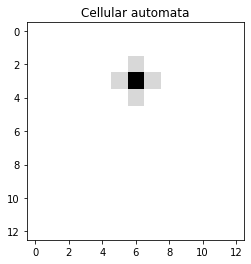

Finish step 1
Start step 2
loading starts
loading finish. Possible situations: 4


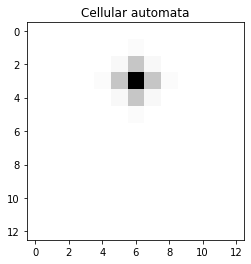

Finish step 2
Start step 3
loading starts
loading finish. Possible situations: 24


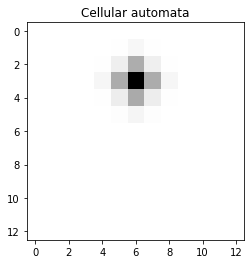

Finish step 3
Start step 4
loading starts
loading finish. Possible situations: 194


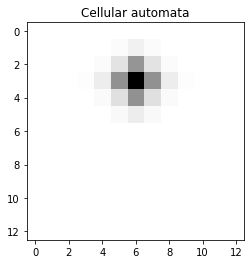

Finish step 4
Start step 5
loading starts
loading finish. Possible situations: 1890


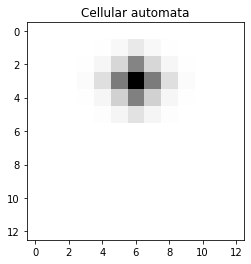

Finish step 5
Start step 6
loading starts
loading finish. Possible situations: 21868


In [ ]:
# main part

solution_prev = []
solution_next = []

start_step = 0
steps = 13

for step in range(start_step,steps):
    print("Start step " + str(step + 1))
    
    if step == 0:
        start_position = np.array([45])
        solution_prev.append(start_position)
        alive = numberToCoordinates(solution_prev[0])
        field_with_values = fillInField(field_basic, alive)
        
#         open file
        file_next_step = open("step"+ str(step+1) +".txt","w+")
    
        for i in range(1,border_start):
            for j in range(1,m-1):
                res = calc(field_with_values, i, j)
                if not(res is None):
                    addingInFile(res,start_position) 
#       close file 
        file_next_step.close()
    else:
        print("loading starts")
        
        frequency = np.loadtxt(fname="frequency"+ str(step) +".txt",dtype=np.uint32)
        solution_prev = np.loadtxt(fname="step"+ str(step) +".txt",dtype=np.uint32)
        
        print("loading finish. Possible situations: " + str(len(solution_prev)))
        
#         open file
        file_next_step = open("step"+ str(step+1) +".txt","w+")
        
        for sol1 in range(0,len(solution_prev)):
            alive = numberToCoordinates(solution_prev[sol1])
            field_with_values = fillInField(field_basic, alive)

            for i in range(1,n-1):
                for j in range(1,m-1):
                    res = calc(field_with_values, i, j)
                    if not(res is None):
                        addingInFile(res,solution_prev[sol1])
            if((sol1+1) % 1000 == 0):
                print("Done: " + str(sol1+1) + "/" + str(len(solution_prev)))
#       close file 
        file_next_step.close()
    
    showField(frequency)
    
    file_frequency = open("frequency"+ str(step + 1) +".txt","w+")
    for j in range(0,len(frequency)):
        frequency_filtered = str(frequency[j][0]) + " "
        for i in range(1,len(frequency[j])):
            frequency_filtered = str(frequency_filtered) + str(frequency[j][i]) + " "
        file_frequency.write(str(frequency_filtered) + "\r\n")
    file_frequency.close()
    
    print("Finish step " + str(step + 1))
#     write solution_next to file here 
#     on the top read solution_prev from file

    solution_prev = []

In [ ]:
# test operations with write/read data from file
# file = open("test"+ str(1) +".txt","w+")

# test = np.array([[41,42,42],[11,12]])

# for j in range(0,len(test)):
#     test_filtered = str(test[j][0]) + " "
#     for i in range(1,len(test[j])):
#         test_filtered = str(test_filtered) + str(test[j][i]) + " "
#     file.write(str(test_filtered) + "\r\n")
# file.close()

# # file_read = open("step"+ str(1) +".txt","r")
# # text = file_read.read()
# # print(text)

# array = np.loadtxt(fname="test"+ str(1) +".txt",dtype=np.int16)
# print(type(array))
# print(array)

In [ ]:
# show frequency on step
# frequency_show = np.loadtxt(fname="frequency"+ str(11) +"F.txt",dtype=np.longdouble)
# for i in range(0,len(frequency_show)):
#     for j in range(0,len(frequency_show[j])):
#         frequency_show[i][j] = (frequency_show[i][j] * 100) / 102857128
# showField(frequency_show)
# print(frequency_show)

In [ ]:
# print("loading starts")
# solution_prev_1 = np.loadtxt(fname="step"+ str(8) +"_1.txt",dtype=np.int32)
# print(len(solution_prev_1))
# print("loading finish")
# print("loading starts")
# solution_prev_2 = np.loadtxt(fname="step"+ str(8) +"_2.txt",dtype=np.int32)
# print(len(solution_prev_2))
# print("loading finish")

In [ ]:
# print("loading starts")
# solution_prev_3 = np.loadtxt(fname="step"+ str(8) +"_3.txt",dtype=np.int32)
# print(len(solution_prev_3))
# print("loading finish")

In [ ]:
# filtering on 8 step, remain only with hole alive situations.
# file_next_step = open("step"+ str(8) +"_filtered.txt","w+")
# for j in range(0,len(solution_prev_1)):
#     for i in range(0,len(solution_prev_1[j])):
#         if solution_prev_1[j][i] >= 81:
#             data_filtered = str(solution_prev_1[j][0]) + " "
#             for w in range(1,len(solution_prev_1[j])):
#                 data_filtered = str(data_filtered) + str(solution_prev_1[j][w]) + " "
#             file_next_step.write(str(data_filtered) + "\r\n")
#             continue
#     if((j+1) % 100000 == 0):
#         print("Done: " + str(j+1) + "/" + str(len(solution_prev_1)))
        
# for j in range(0,len(solution_prev_2)):
#     for i in range(0,len(solution_prev_2[j])):
#         if solution_prev_2[j][i] >= 81:
#             data_filtered = str(solution_prev_2[j][0]) + " "
#             for w in range(1,len(solution_prev_2[j])):
#                 data_filtered = str(data_filtered) + str(solution_prev_2[j][w]) + " "
#             file_next_step.write(str(data_filtered) + "\r\n")
#             continue
#     if((j+1) % 100000 == 0):
#         print("Done: " + str(j+1) + "/" + str(len(solution_prev_2)))
        
# for j in range(0,len(solution_prev_3)):
#     for i in range(0,len(solution_prev_3[j])):
#         if solution_prev_3[j][i] >= 81:
#             data_filtered = str(solution_prev_3[j][0]) + " "
#             for w in range(1,len(solution_prev_3[j])):
#                 data_filtered = str(data_filtered) + str(solution_prev_3[j][w]) + " "
#             file_next_step.write(str(data_filtered) + "\r\n")
#             continue
#     if((j+1) % 100000 == 0):
#         print("Done: " + str(j+1) + "/" + str(len(solution_prev_3)))

# file_next_step.close() 

# show each situation in the step
# solution_prev = np.loadtxt(fname="frequency"+ str(11) +"F.txt",dtype=np.int16)
# for w in range(0,len(solution_prev)):
#     alive = numberToCoordinates(solution_prev[w])
#     field_with_values = fillInField(field_basic, alive)
#     showField(field_with_values)